In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"F:\data sets\New folder\train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
features=data.iloc[:,:-1].values
label=data.iloc[:,[-1]].values

In [6]:
print("features:",features.shape)
print("label:",label.shape)

features: (2000, 20)
label: (2000, 1)


In [7]:
features.ndim

2

In [8]:
#normalizing the data why?
#1:-when we have more input features at time it is required to improve the accurancy
#2:-it is used to change the calues into a common scale without destroying the previous
#3:-after applying normalization there is a change in accurancy 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=scaler.fit_transform(features)

In [10]:
#perform one hot encoading
#because it has three values we are converting into binary classfication
data["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
label=ohe.fit_transform(label).toarray()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [13]:
import keras

Using TensorFlow backend.


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=20))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
histoy=model.fit(X_train,y_train,epochs=100,batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1600/1600 [==============================] - 23s 14ms/step - loss: 1.4444 - acc: 0.2644
Epoch 2/100
1600/1600 [==============================] - 0s 125us/step - loss: 1.3587 - acc: 0.3163
Epoch 3/100
1600/1600 [==============================] - 0s 87us/step - loss: 1.3012 - acc: 0.3906
Epoch 4/100
1600/1600 [==============================] - 0s 75us/step - loss: 1.2429 - acc: 0.4313
Epoch 5/100
1600/1600 [==============================] - 0s 78us/step - loss: 1.1758 - acc: 0.4794: 0s - loss: 1.1749 - acc: 0.476
Epoch 6/100
1600/1600 [==============================] - 0s 78us/step - loss: 1.0974 - acc: 0.5237
Epoch 7/100
1600/1600 [==============================] - 0s 79us/step - loss: 1.0144 - acc: 0.5650
Epoch 8/100
1600/1600 [==============================] - 0s 78us/step - loss: 0.9318 - acc: 0.6038
Epoch 9/100
1600/1600 [==============================] - 0s 80us/step - loss: 0

1600/1600 [==============================] - 0s 107us/step - loss: 0.0571 - acc: 0.9925
Epoch 77/100
1600/1600 [==============================] - 0s 135us/step - loss: 0.0554 - acc: 0.9931
Epoch 78/100
1600/1600 [==============================] - 0s 126us/step - loss: 0.0541 - acc: 0.9937
Epoch 79/100
1600/1600 [==============================] - 0s 140us/step - loss: 0.0529 - acc: 0.9931
Epoch 80/100
1600/1600 [==============================] - 0s 98us/step - loss: 0.0520 - acc: 0.9931
Epoch 81/100
1600/1600 [==============================] - 0s 115us/step - loss: 0.0507 - acc: 0.9937
Epoch 82/100
1600/1600 [==============================] - 0s 119us/step - loss: 0.0503 - acc: 0.9950
Epoch 83/100
1600/1600 [==============================] - 0s 127us/step - loss: 0.0487 - acc: 0.9944
Epoch 84/100
1600/1600 [==============================] - 0s 98us/step - loss: 0.0483 - acc: 0.9950
Epoch 85/100
1600/1600 [==============================] - 0s 84us/step - loss: 0.0463 - acc: 0.9969
Epoch 

In [18]:
y_pred=model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [19]:
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [20]:
from sklearn.metrics import accuracy_score
score=accuracy_score(pred,test)


In [29]:
score*100

89.0

In [22]:
histoy=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 1s 531us/step - loss: 0.0397 - acc: 0.9931 - val_loss: 0.3046 - val_acc: 0.8825
Epoch 2/100
1600/1600 [==============================] - 0s 262us/step - loss: 0.0383 - acc: 0.9962 - val_loss: 0.3063 - val_acc: 0.8900
Epoch 3/100
1600/1600 [==============================] - 0s 276us/step - loss: 0.0344 - acc: 0.9962 - val_loss: 0.2994 - val_acc: 0.8850
Epoch 4/100
1600/1600 [==============================] - 0s 231us/step - loss: 0.0344 - acc: 0.9975 - val_loss: 0.3186 - val_acc: 0.8925
Epoch 5/100
1600/1600 [==============================] - 0s 258us/step - loss: 0.0317 - acc: 0.9969 - val_loss: 0.3030 - val_acc: 0.8925
Epoch 6/100
1600/1600 [==============================] - 0s 287us/step - loss: 0.0321 - acc: 0.9975 - val_loss: 0.3119 - val_acc: 0.8900
Epoch 7/100
1600/1600 [==============================] - 1s 333us/step - loss: 0.0306 - acc: 0.9969 - val_loss: 0.3190 - val_acc: 0

1600/1600 [==============================] - 0s 195us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.4531 - val_acc: 0.8975
Epoch 61/100
1600/1600 [==============================] - 0s 185us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.4575 - val_acc: 0.8950
Epoch 62/100
1600/1600 [==============================] - 0s 185us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4572 - val_acc: 0.9000
Epoch 63/100
1600/1600 [==============================] - 0s 192us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4628 - val_acc: 0.9000
Epoch 64/100
1600/1600 [==============================] - 0s 184us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.4638 - val_acc: 0.8925
Epoch 65/100
1600/1600 [==============================] - 0s 184us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.4693 - val_acc: 0.9000
Epoch 66/100
1600/1600 [==============================] - 0s 186us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4684 - val_acc: 0.9000
Epoch 67/100
1600/1600 [=======================

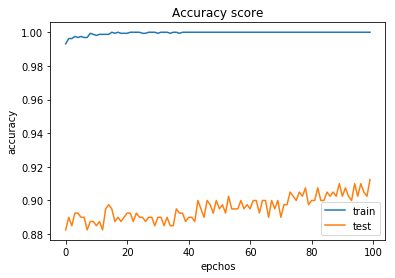

In [28]:
plt.plot(histoy.history['acc'])
plt.plot(histoy.history['val_acc'])
plt.xlabel('epchos')
plt.ylabel('accuracy')
plt.title('Accuracy score')
plt.legend(['train','test'],loc='upper_left')
plt.show()

Text(0.5, 1.0, 'loss')

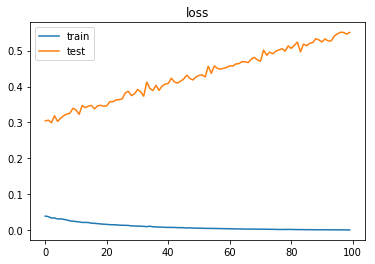

In [25]:
plt.plot(histoy.history['loss'])
plt.plot(histoy.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')